# **NETFLIX CASE STUDY USING PYTHON LIBRARIES AND DATA VISUALIZATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

df = pd.read_csv("netflix.csv")
df.head()

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 26.6MB/s]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Observations on the shape of data, data types of all the attributes, missing value detection**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

The given file has 8807 enteries along with 12 features to each.
Data types of all the features except release_year(type: int) is of type object.
The columns director, cast, country, date_added, rating, duration have the missing values
The statistical summary can be applied on type int column i.e release_year.

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


From the above table we can observe that there a total of 8807 movies or tv shows and 2019 has 75% of the movies released.


In [ ]:
np.sum(df.isnull() , axis = 0) # finding missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

These missing values can be fixed using imputation by calculating the mode for director, cast and country. Date added can be filled with their respective released year.
Drop Nan rows of rating, duration, country, director and cast after imputation

**Drop NaN values from rating and duration**

In [ ]:
df1 = df.dropna(subset = ("rating" , "duration"))
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      6169 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
 11  description   8800 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.8+ KB


In [ ]:
#Getting those indices of rows where country, cast and director are Nan and then drop them
null_df = df1[['country','cast','director']].isna()
null_df = null_df[ (null_df['country']==True) & (null_df['cast']==True) & (null_df['director']==True) ]
index_to_drop = null_df.index
index_to_drop

Int64Index([   3,   10,   14,   74,  123,  147,  181,  218,  224,  234,  242,
             320,  368,  369,  379,  404,  430,  465,  466,  490,  497,  549,
             641,  653,  710,  738,  761,  842,  851,  852,  854,  925,  936,
             957, 1005, 1038, 1056, 1094, 1095, 1116, 1224, 1225, 1723, 1828,
            1889, 1890, 1952, 2101, 2152, 2222, 2236, 2335, 2394, 2425, 2432,
            2495, 2568, 2569, 2699, 2893, 2982, 3393, 3394, 3395, 3396, 3397,
            3469, 3539, 3592, 3789, 3837, 3953, 3987, 4015, 4056, 4199, 4250,
            4372, 4627, 4637, 4654, 5291, 5799, 5870, 6389, 6618, 7017, 7222,
            7438, 7483, 7624, 7812, 8109, 8199, 8609, 8803],
           dtype='int64')

In [ ]:
df1 = df1.drop(index=index_to_drop)
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Imputation for the column date_added using the corresponding value in release_year**


In [ ]:
df1["date_added"] = df1["date_added"].fillna(df1["release_year"])
df1["date_added"].isna().sum() # checks whether there are any missing value left

0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      6169 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


**Imputation for the directors**


In [ ]:
director_fill = df1.groupby(['type',"listed_in","country"])['director'].apply(lambda x: x.mode())
director_fill = director_fill.reset_index()
director_fill

,type,listed_in,country,level_3,director
0,Movie,Action & Adventure,"Australia, United States",0,Simon Wincer
1,Movie,Action & Adventure,"Bulgaria, United States",0,Todor Chapkanov
2,Movie,Action & Adventure,Canada,0,Adam Alleca
3,Movie,Action & Adventure,Canada,1,Allan Ungar
4,Movie,Action & Adventure,Canada,2,Brett Donowho
...,...,...,...,...,...
3195,TV Show,TV Shows,Japan,0,"Kobun Shizuno, Hiroyuki Seshita"
3196,TV Show,TV Shows,Saudi Arabia,0,"Ali Kalthami, Meshal Aljaser, Faris Godus, Moh..."
3197,TV Show,TV Shows,United States,0,"Joe Berlinger, Bruce Sinofsky"
3198,TV Show,TV Shows,United States,1,"Oscar Micheaux, Spencer Williams, Richard E. N..."


In [ ]:
# imputing director with mode
df1 = df1.merge(director_fill, on = ["type","listed_in","country" ] , how = 'left')
df1["director"] = np.where(df1["director_x"].isna(), df1["director_y"], df1["director_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(director_fill[['type',"listed_in","director"]], on = ["type","listed_in"] , how = 'left')
df2["director"] = np.where(df2["director_x"].isna(), df2["director_y"], df2["director_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )

df3 = df2.merge(director_fill[['type',"director"]], on = ["type"] , how = 'left')
df3["director"] = np.where(df3["director_x"].isna(), df3["director_y"], df3["director_x"])
df3 = df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3

df3 = df3.drop_duplicates(subset='show_id')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 18958929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [ ]:
df3["director"].isna().sum()

0

In [ ]:
df1=df3
df2=df3

**Imputation of Cast**

In [ ]:
cast_fill = df1.groupby(['type',"listed_in","country"])['cast'].apply(lambda x: x.mode())
cast_fill = cast_fill.reset_index()
cast_fill

,type,listed_in,country,level_3,cast
0,Movie,Action & Adventure,"Australia, United States",0,"Tom Selleck, Laura San Giacomo, Alan Rickman, ..."
1,Movie,Action & Adventure,"Bulgaria, United States",0,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb..."
2,Movie,Action & Adventure,Canada,0,"Cole Hauser, Bruce Willis, Shawn Ashmore, Asht..."
3,Movie,Action & Adventure,Canada,1,"Dominic Purcell, Cody Hackman, Stephen Lang, T..."
4,Movie,Action & Adventure,Canada,2,"Jason Momoa, Garret Dillahunt, Jill Wagner, St..."
...,...,...,...,...,...
6470,TV Show,TV Shows,India,0,"Rahman, Havish, Regina Cassandra, Nandita Swet..."
6471,TV Show,TV Shows,India,1,"Suriya, Vijay Sethupathi, Revathy, Prakash Raj..."
6472,TV Show,TV Shows,Japan,0,"Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa..."
6473,TV Show,TV Shows,Saudi Arabia,0,"Moayad Alnefaie, Mohammed Alhamdan, Citi Bet B..."


In [ ]:
df1 = df1.merge(cast_fill, on = ["type","listed_in","country" ] , how = 'left')
df1["cast"] = np.where(df1["cast_x"].isna(), df1["cast_y"], df1["cast_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(cast_fill[['type',"listed_in","cast"]], on = ["type","listed_in"] , how = 'left')
df2["cast"] = np.where(df2["cast_x"].isna(), df2["cast_y"], df2["cast_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )

df3 = df2.merge(cast_fill[['type',"cast"]], on = ["type"] , how = 'left')
df3["cast"] = np.where(df3["cast_x"].isna(), df3["cast_y"], df3["cast_x"])
df3 = df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3

df3 = df3.drop_duplicates(subset='show_id')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 33369933
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          8704 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [ ]:
df1=df3
df2=df3

**Imputation of Country**

In [ ]:
country_fill = df1.groupby(["cast","director"])['country'].apply(lambda x: x.mode())
country_fill = country_fill.reset_index()
country_fill

,cast,director,level_2,country
0,"'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Od...",Jay Oliva,0,Nigeria
1,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",Muh Chen,0,South Korea
2,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",Mike Gunther,0,United States
3,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",Michael D. Black,0,United States
4,A.R. Rahman,Rudradeep Bhattacharjee,0,India
...,...,...,...,...
7648,"İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cen...",Bedran Güzel,0,Turkey
7649,"İbrahim Çelikkol, Belçim Bilgin, Alican Yüceso...",Ehtesham Uddin,0,Turkey
7650,"Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre K...",Hakan Algül,0,Turkey
7651,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Neslihan Yesilyurt,0,Turkey


In [ ]:
df1 = df1.merge(country_fill, on = ["cast","director"] , how = 'left')
df1["country"] = np.where(df1["country_x"].isna(), df1["country_y"], df1["country_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(country_fill[["country","cast"]], on = ["cast"] , how = 'left')
df2["country"] = np.where(df2["country_x"].isna(), df2["country_y"], df2["country_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )


df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 33178
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          8704 non-null   object
 5   country       8099 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [ ]:
m = df['country'].mode()[0] #United States appears the most therefore add United States in the missing rows of country
df2["country"] = df2['country'].fillna(m)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 33178
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          8704 non-null   object
 5   country       8704 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [ ]:
#check whether all the missing values are handled or not
df2.isna().sum().sum()

0

In [ ]:
#reset the index
df2 = df2.reset_index(drop=True)
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s5,TV Show,Kota Factory,BB Sasore,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8699,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8700,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8701,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8702,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#Chaning format of date_added to datetime type
df2['date_added'] = pd.to_datetime(df['date_added'])
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s5,TV Show,Kota Factory,BB Sasore,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


After handling all the missing values we now have a dataframe of 8704 rows with 12 columns

**Non-Graphical Analysis: Value counts and unique attributes**
1) Let us analyse the distribution of Movies and the TV Show in the dataset


In [ ]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

There are 6109 Movies and 2595 TV Shows in dataset.


**Unnesting of listed_in**

In [ ]:
df3 = df2["listed_in"].str.split(",",expand=True).add_prefix('listed_in')
df4= pd.merge(df2, df3, left_index=True, right_index=True)
df4.drop("listed_in",axis=1,inplace=True)
df4=pd.melt(df4, id_vars=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'description'],value_name ='listed_in').drop("variable",axis=1)
df4.dropna(subset=['listed_in'],inplace=True)
df4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows
3,s5,TV Show,Kota Factory,BB Sasore,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,International TV Shows
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,TV Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...
26104,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-05-06,2014,TV-MA,131 min,A philandering small-town mechanic's political...,International Movies
26106,s8801,TV Show,Zindagi Gulzar Hai,Ehtesham Uddin,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2019-04-18,2012,TV-PG,1 Season,"Strong-willed, middle-class Kashaf and carefre...",TV Dramas
26107,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2017-11-01,2015,TV-MA,96 min,Recovering alcoholic Talal wakes up inside a s...,Thrillers
26108,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2016-09-15,2007,R,158 min,"A political cartoonist, a crime reporter and a...",Thrillers


In [ ]:
cast_unested = df4["cast"].str.split(",",expand=True).add_prefix('cast')
df4= pd. merge(df4,cast_unested , left_index=True, right_index=True)
df4.drop("cast",axis=1,inplace=True)
df4=pd.melt(df4, id_vars=['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'description','listed_in'],value_name ='cast').drop("variable",axis=1)
df4.dropna(subset=['cast'],inplace=True)
df4

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,listed_in,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,Craig Sechler
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,Sami Bouajila
3,s5,TV Show,Kota Factory,BB Sasore,India,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,International TV Shows,Mayur More
4,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,TV Dramas,Kate Siegel
...,...,...,...,...,...,...,...,...,...,...,...,...
939180,s1855,TV Show,Social Distance,Jay Chandrasekhar,United States,2020-10-22,2020,TV-MA,1 Season,"Filmed in isolation, this narrative anthology ...",TV Comedies,Lovie Simone
941075,s3775,TV Show,Black Mirror,Philippa Lowthorpe,United Kingdom,2019-06-28,2019,TV-MA,5 Seasons,This sci-fi anthology series explores a twiste...,British TV Shows,Rafe Spall
947461,s1855,TV Show,Social Distance,Jay Chandrasekhar,United States,2020-10-22,2020,TV-MA,1 Season,"Filmed in isolation, this narrative anthology ...",TV Dramas,Lovie Simone
949012,s3775,TV Show,Black Mirror,Philippa Lowthorpe,United Kingdom,2019-06-28,2019,TV-MA,5 Seasons,This sci-fi anthology series explores a twiste...,International TV Shows,Rafe Spall


In [ ]:
df2 = df4
df1 = df4
df3 = df4

In [ ]:
unnest_coloumn = df1["director"].str.split(",",expand=True).add_prefix('director') # expand = True creates coloumns instead od keeping it in list format | .add_prefix('listed_in') will add prefix to new colomn

df2 = df1.merge(unnest_coloumn, left_index=True, right_index=True)

df2.drop("director",axis=1,inplace=True)

df3=pd.melt(df2, id_vars=['show_id', 'type', 'title', 'listed_in', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'description']
            ,value_name ='director').drop("variable",axis=1)

df3.dropna(subset=['director'],inplace=True)
df1 = df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168211 entries, 0 to 1962014
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       168211 non-null  object        
 1   type          168211 non-null  object        
 2   title         168211 non-null  object        
 3   listed_in     168211 non-null  object        
 4   cast          168211 non-null  object        
 5   country       168211 non-null  object        
 6   date_added    168063 non-null  datetime64[ns]
 7   release_year  168211 non-null  int64         
 8   rating        168211 non-null  object        
 9   duration      168211 non-null  object        
 10  description   168211 non-null  object        
 11  director      168211 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 16.7+ MB


In [ ]:
unnest_coloumn = df1["country"].str.split(",",expand=True).add_prefix('country') # expand = True creates coloumns instead od keeping it in list format | .add_prefix('listed_in') will add prefix to new colomn

df2 = df1.merge(unnest_coloumn, left_index=True, right_index=True)

df2.drop("country",axis=1,inplace=True)

df3=pd.melt(df2, id_vars=['show_id', 'type', 'title', 'director', 'cast', 'listed_in', 'date_added','release_year', 'rating', 'duration', 'description']
            ,value_name ='country').drop("variable",axis=1)
df3.dropna(subset=['country'],inplace=True)
df1 = df3
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210281 entries, 0 to 1863790
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       210281 non-null  object        
 1   type          210281 non-null  object        
 2   title         210281 non-null  object        
 3   director      210281 non-null  object        
 4   cast          210281 non-null  object        
 5   listed_in     210281 non-null  object        
 6   date_added    210085 non-null  datetime64[ns]
 7   release_year  210281 non-null  int64         
 8   rating        210281 non-null  object        
 9   duration      210281 non-null  object        
 10  description   210281 non-null  object        
 11  country       210281 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.9+ MB


In [ ]:
df1["country"].value_counts().head(10)

United States     62885
India             23249
United Kingdom    10138
 United States     9819
Japan              7378
South Korea        5766
France             4856
Canada             4567
Spain              4301
 France            4104
Name: country, dtype: int64

We can see that countries have duplicates values in it and have some spaces before it which are to be handled usig strip function and then delete the duplicates

In [ ]:
df1["cast"] = df1["cast"].str.strip()
df1['listed_in'] = df1["listed_in"].str.strip()
df1['director'] = df1["director"].str.strip()
df1['country'] = df1["country"].str.strip()

df1.drop_duplicates(keep="first",inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210226 entries, 0 to 1863790
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       210226 non-null  object        
 1   type          210226 non-null  object        
 2   title         210226 non-null  object        
 3   director      210226 non-null  object        
 4   cast          210226 non-null  object        
 5   listed_in     210226 non-null  object        
 6   date_added    210030 non-null  datetime64[ns]
 7   release_year  210226 non-null  int64         
 8   rating        210226 non-null  object        
 9   duration      210226 non-null  object        
 10  description   210226 non-null  object        
 11  country       210226 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.9+ MB


In [ ]:
df1["country"].value_counts().head(10)

United States     72679
India             23970
United Kingdom    13466
France             8958
Japan              8784
Canada             8157
South Korea        6219
Spain              5398
Germany            4488
Mexico             4193
Name: country, dtype: int64

All the duplicates are removed and unesting is done.

In [ ]:
df1.head(5)

,show_id,type,title,director,cast,listed_in,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,Documentaries,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,Ama Qamata,International TV Shows,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,Crime TV Shows,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,United States
3,s5,TV Show,Kota Factory,BB Sasore,Mayur More,International TV Shows,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,India
4,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,TV Dramas,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,United States


# **Handling duration column**
Creating a separate dataframe for movies and TV Shows for further analysis

In [ ]:
movies_df = df1[df1['type'] == 'Movie']
movies_df['duration'] = movies_df['duration'].str.split().apply(lambda x : x[0])
movies_df.head()     # Movies df contains all the details of movies

,show_id,type,title,director,cast,listed_in,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,Documentaries,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States
5,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Children & Family Movies,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,United States
6,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Dramas,2021-09-24,1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",United States
8,s10,Movie,The Starling,Theodore Melfi,Melissa McCarthy,Comedies,2021-09-24,2021,PG-13,104,A woman adjusting to life after a loss contend...,United States
10,s13,Movie,Je Suis Karl,Christian Schwochow,Luna Wedler,Dramas,2021-09-24,2021,TV-MA,127,After most of her family is murdered in a terr...,Germany


In [ ]:
TV_df = df1[df1['type'] == 'TV Show']
TV_df['duration'] = TV_df['duration'].str.split().apply(lambda x : x[0])
XYZ = TV_df
TV_df.head()  # TV df has data of all the TV Shows

,show_id,type,title,director,cast,listed_in,date_added,release_year,rating,duration,description,country
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,Ama Qamata,International TV Shows,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,Crime TV Shows,2021-09-24,2021,TV-MA,1,To protect his family from a powerful drug lor...,United States
3,s5,TV Show,Kota Factory,BB Sasore,Mayur More,International TV Shows,2021-09-24,2021,TV-MA,2,In a city of coaching centers known to train I...,India
4,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,TV Dramas,2021-09-24,2021,TV-MA,1,The arrival of a charismatic young priest brin...,United States
7,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,British TV Shows,2021-09-24,2021,TV-14,9,A talented batch of amateur bakers face off in...,United Kingdom


**Insights based on Non-Graphical and Visual Analysis**

In [ ]:
df1 = df1.rename(columns={"listed_in":"genre"}) #renaming the column listed_in to genre for further analysis
palette = ['#221F1F', '#B20710', '#E50914','#F5F5F1'] #seting the palette with red and black
sns.set_palette(palette)


**Comparing movies and tv shows in the given netflix dataset**

In [ ]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

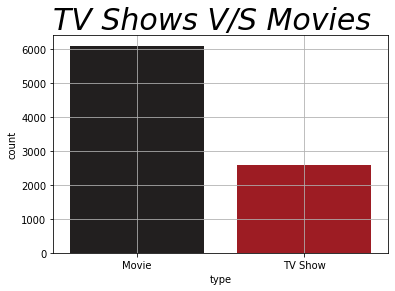

In [ ]:
data = df1
data = data.drop_duplicates("title")

sns.countplot(data = data, x="type") # Dodget Bar Chart
plt.title("TV Shows V/S Movies" , fontsize = 30 ,  loc="left",
          fontstyle='italic', color= 'black')
plt.grid()
plt.show()

Netflix has produced more number of movies than TV shows.

**Most popular genre in movies and tv shows**

In [ ]:
#List of all the genre of movies present in Netflix
movies_df["listed_in"].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas', 'Comedies',
       'Thrillers', 'Horror Movies', 'Action & Adventure',
       'International Movies', 'Sci-Fi & Fantasy', 'Classic Movies',
       'Stand-Up Comedy', 'Movies', 'Anime Features', 'Cult Movies',
       'Independent Movies', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'Sports Movies', 'Faith & Spirituality'],
      dtype=object)

In [ ]:
len(movies_df["listed_in"].unique())

20

There are 20 different genre present in movies


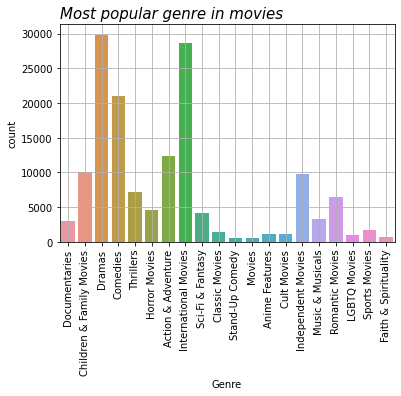

In [ ]:
#Most popular genre in movies

sns.countplot(data = movies_df, x="listed_in") # Dodget Bar Chart
plt.xlabel("Genre")
plt.title("Most popular genre in movies" , fontsize = 15 ,  loc="left",
          fontstyle='italic', color= 'black')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

Dramas , International movies ,Comedies, Action and adventure are the most popular genres produced by Netflix where as LGBTQ movies ,Faith & Spirituality and cult movies are least produced movies.

In [ ]:
#List of all the genre of TV_shows present in Netflix

TV_df["listed_in"].unique()

array(['International TV Shows', 'Crime TV Shows', 'TV Dramas',
       'British TV Shows', 'TV Comedies', 'Docuseries', "Kids' TV",
       'Reality TV', 'Anime Series', 'TV Shows', 'TV Action & Adventure',
       'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV',
       'Romantic TV Shows', 'TV Horror', 'Spanish-Language TV Shows',
       'TV Sci-Fi & Fantasy', 'Korean TV Shows', 'Science & Nature TV',
       'TV Mysteries', 'Teen TV Shows', 'TV Thrillers'], dtype=object)

In [ ]:
print("Number of different TV_show genres are ",  len(TV_df["listed_in"].unique()))

Number of different TV_show genres are  22


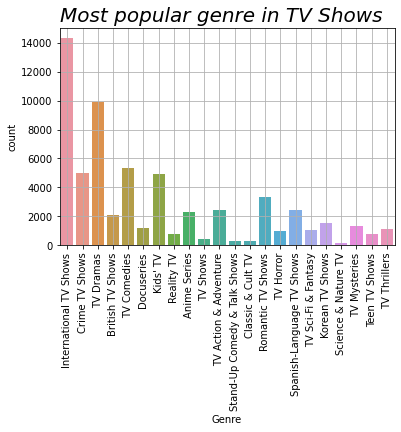

In [ ]:
#Most popular genre in TV Shows

sns.countplot(data = TV_df, x="listed_in") # Dodget Bar Chart
plt.xlabel("Genre")
plt.title("Most popular genre in TV Shows" , fontsize = 20 ,  loc="left",
          fontstyle='italic', color= 'black')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

As we can see from the above graph International TV Show is the most popular genre in TV Show and Science & Nature related TV Shows are viewed less by user and may be thats why they are least popular

In [ ]:
df2 = pd.concat([movies_df, TV_df], axis=0) #concatenating both movies and tv shows dataframe for general analysis on content present in Netflis
df2.reset_index(drop=True , inplace = True)
df2['duration'] = df2['duration'].astype(int)
df2 = df1.rename(columns={"listed_in":"genre"})
df1 = df2
df3 = df2
df1.head()

,show_id,type,title,director,cast,genre,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,Documentaries,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,Ama Qamata,International TV Shows,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,Crime TV Shows,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,United States
3,s5,TV Show,Kota Factory,BB Sasore,Mayur More,International TV Shows,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,India
4,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,TV Dramas,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,United States


**What type of content is available in different countries ?**

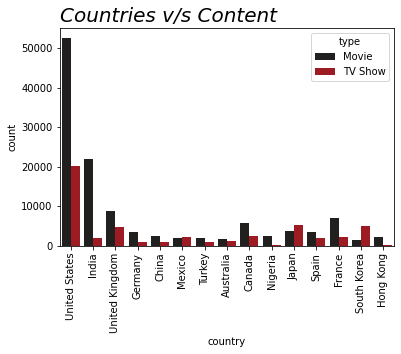

In [ ]:
con = df1['country'].value_counts().head(15)
con = con.reset_index()

data = df1[df1['country'].isin(con['index'])]
sns.countplot(data = data, x="country", hue="type") # Dodget Bar Chart
plt.title("Countries v/s Content" , fontsize = 20 ,  loc="left",
          fontstyle='italic', color= 'black')
plt.xticks(rotation = 90)
plt.show()

As seen in the above graph most of movies are produced in United States followed by India and United Kingdom.There is huge difference between TV shows and movies produced in United States which can mean that United States prefer watching movies than Tv shows. Countries like Japan ,South Korea has maximum TV Shows produced .Countries like Mexico produce equal amount of Movies and Tv shows.India has produced more movies compared to Tv shows.

**Top 5 Genre in United States and India**

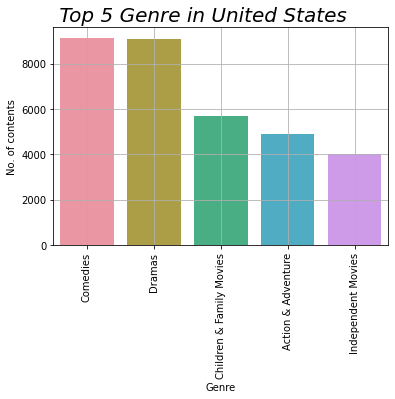

In [ ]:
#Top 5 genre in United States

gen_us = df1[ (df1["country"]=="United States")]
gen = gen_us['genre'].value_counts().head(5)
gen = gen.reset_index()
gen.rename(columns={"index":"Genre" , "genre":"No. of contents"} , inplace = True)

sns.barplot(data = gen, x="Genre", y ="No. of contents"  )  # Boxplot
plt.xticks(rotation = 90)
plt.grid()
plt.title(" Top 5 Genre in United States" , fontsize = 20 ,  loc="left",
          fontstyle='italic', color= 'black')
plt.show()

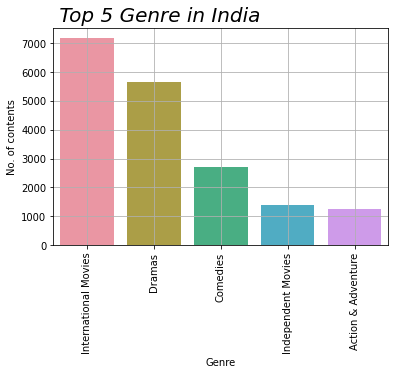

In [ ]:
# Top 5 Genre in India
ind_df = df1[ (df1["country"]=="India")]
ind = ind_df['genre'].value_counts().head(5)
ind = ind.reset_index()
ind.rename(columns={"index":"Genre" , "genre":"No. of contents"} , inplace = True)

sns.barplot(data = ind, x="Genre", y ="No. of contents"  )  # Boxplot
plt.xticks(rotation = 90)
plt.grid()
plt.title(" Top 5 Genre in India" , fontsize = 20 ,  loc="left",
          fontstyle='italic', color= 'black' )
plt.show()

From both the plot we can see that United States prefer to watch Comedies and Drama genre where as in Indian, users prefer to watch International movies and  Drama genre

**How has the number of movies and tv shows released per year changed over the last 20-30 years ?**

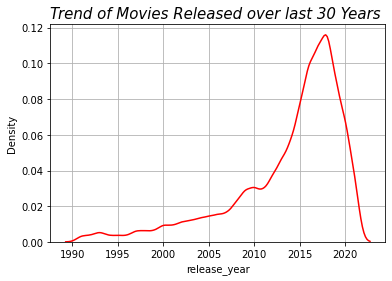

In [ ]:
# How has the number of movies released per year changed over the last 20-30 years?
yyy = df2[ (df2['release_year'] > 1990)   &  (df2['type'] == "Movie")  ] #masking the year = last 30 years
yyy

sns.kdeplot(data=yyy, x="release_year" , color = "red") # Kernel Density Estimation(KDE) shows the trend
plt.grid()
plt.title('Trend of Movies Released over last 30 Years',  fontsize = 15 ,  loc="left",
          fontstyle='italic', color= 'black' )
plt.show()

In the past 20 years number of movies per year was continuously increasing
but the peak of higher released movies are in 2017-2018. There is a sudden fall after 2019 due to Covid-19.

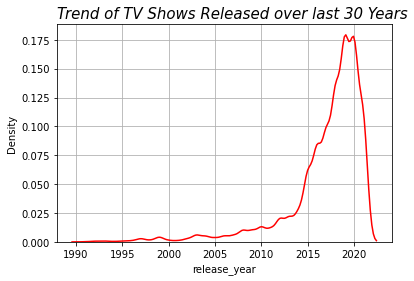

In [ ]:
# How has the number of shows released per year changed over the last 20-30 years?
xxx = df2[ (df2['release_year'] > 1990)   &  (df2['type'] == "TV Show")  ]


sns.kdeplot(data=xxx, x="release_year" , color = "red") # Kernel Density Estimation(KDE) shows the trend
plt.grid()
plt.title('Trend of TV Shows Released over last 30 Years',  fontsize = 15 ,  loc="left",
          fontstyle='italic', color= 'black' )
plt.show()

In the past 20 years number of tv per year was continuously increasing
but the peak of higher released movies are in 2017-2018.

**How is the growth rate between Movie and TV show by year**

<ipython-input-122-ce6537364d83>:5: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



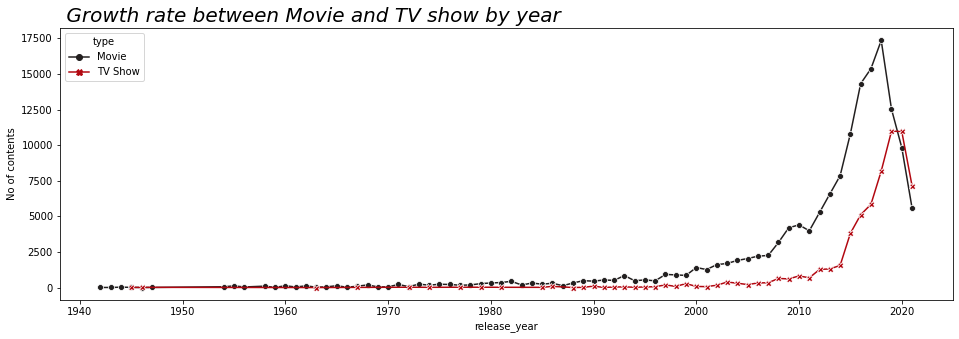

In [ ]:
type_year = (df1.groupby(['type','release_year'])['title'].size()).reset_index() #grouping by type and release_year and counting on tittle
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'release_year',y = 'title',hue = 'type',style = 'type',palette= palette,markers=True, dashes=False) #Line plot
plt.title(" Growth rate between Movie and TV show by year" ,  fontsize = 20 ,  loc="left",
          fontstyle='italic', color= 'black')
plt.ylabel("No of contents")
plt.show()

By the above Visualization we can infer that Performance of both Movie and TV Shows released over years has been nearly same.

**The year in which most of the movies/ tv shows were added to Netflix**

In [ ]:
data1 = df2.drop_duplicates(['title',"director"])
data1["release_year"].value_counts()

2018    1290
2017    1139
2019    1138
2020    1070
2016    1013
        ... 
1942       2
1947       2
1966       1
1959       1
1961       1
Name: release_year, Length: 73, dtype: int64

2018 has the maximum number of movies or tv shows released where as 1966,1959,1961 has least. 2017 and 2019 nearly had same amount of content released

** What is the best time to launch a TV show or movies ?**

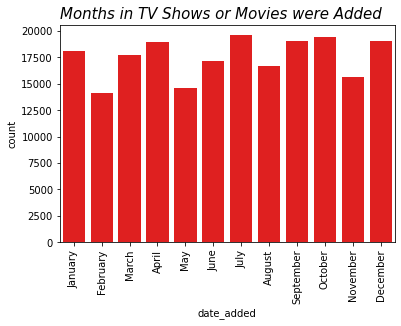

In [ ]:
data = df1["date_added"].dt.strftime('%B')
data = data.reset_index()
mon = ["January", "February", "March", "April","May", "June", "July", "August", "September", "October", "November", "December"]

sns.countplot(data = data, x="date_added" ,color='red', order=mon) # Dodget Bar Chart
plt.title("Months in TV Shows or Movies were Added" ,   fontsize = 15 ,  loc="left",
          fontstyle='italic', color= 'black')
plt.xticks(rotation = 90)
plt.show()

July, December or October seem to be best time to launch a show.This can be because of festival or summer holidays. February isnt a great time to launch.

**Top 5 Directors who worked in maximum number of movies & TV Shows**

In [ ]:
movies = movies_df.drop_duplicates(['title',"director"])
TV = TV_df.drop_duplicates(['title',"director"])
movies['director'].value_counts()


Jan Suter          31
Raúl Campos        29
Marcus Raboy       22
Rajiv Chilaka      22
Richard Bailey     18
                   ..
Frank W Chen        1
Emmanuel Mouret     1
Conor Allyn         1
Nuel Naval          1
Mark Henn           1
Name: director, Length: 4775, dtype: int64

Jan Suter is the most popular movie director in Netflix who has directed about 31 movies followed by Raul Campus, Marcus Raboy and Rajiv Chilaka. Rajiv Chilaka is an Indian director who has made around 22 movies in Children & Family Movies and Sports Movies genre.Director Jan Suter is well known for his Stand-Up Comedy with TV-MA, TV-14 rating.

In [ ]:
#5 most popular TV Show directors
TV['director'].value_counts().head(5)

Jay Oliva           659
Tony Collingwood    198
Mat King            101
Ehtesham Uddin       89
Michael Simon        87
Name: director, dtype: int64

Jay Oliva iis the most popular TV show director. Other popular directors are Tony Collingwood, Mat King and Ehtesham Uddin.

**Top 5 Actors/Cast who worked in maximum number of movies or TV Show.**

In [ ]:
# 5 most movie actor on Netflix

movies = movies_df.drop_duplicates(['title',"cast"])
tv = TV_df.drop_duplicates(['title',"cast"])
movies['cast'].value_counts().head(5)

Craig Sechler       136
El Negro Álvarez     70
Anupam Kher          42
Shah Rukh Khan       35
Ben Ferencz          33
Name: cast, dtype: int64

Craig Sechler is the famous actor who has been featured in most of the movies.
Shah Rukh Khan and Anupam Kher are most popular Indian actors featured on Netflix

In [ ]:
TV['cast'].value_counts().head(5)  #most popular cast in Tvshows

Morgan Freeman        38
R. Kelly              36
David Attenborough    29
Marie Kondo           21
Chris Bourke          21
Name: cast, dtype: int64

Morgan Freeman is most popular actor among TV shows followed by R.Kelly and David Attenborough

**Analysis on Ratings of Movies or TV shows**

In [ ]:
df2["rating"].unique() #list of ratings given to any Tv show or movies

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#Top 5 ratings given to movies
movies = movies_df.drop_duplicates(['show_id','title',"director",])
tv = TV_df.drop_duplicates(['show_id','title',"director"])
movies['rating'].value_counts().head(5)


TV-MA    2350
TV-14    1548
R         861
TV-PG     603
PG-13     524
Name: rating, dtype: int64

In [ ]:
# Top 5 Ratings OF movies in US
movies_us = df1[(df1['type'] == "Movie") & (df1['country'] == "United States")]
tv_us = df1[(df1['type'] == "TV Show") & (df1['country'] == "United States")]

movies_us = movies_us.drop_duplicates(['title'])
tv_us = tv_us.drop_duplicates(['title'])
movies_us['rating'].value_counts().tail(5)

NR          41
G           39
TV-Y7-FV     2
NC-17        1
UR           1
Name: rating, dtype: int64

Most of the movies released by US are rated TV-MA followed by R.
There hardly 2 movies with NC-17 and UR ratings.

**Analysis on tv shows and total seasons of each shows **

In [ ]:
tv = df1[df1['type'] == "TV Show"]
tv = tv.drop_duplicates(['title'])
tv["duration"].value_counts(ascending = True)

17 Seasons       1
15 Seasons       2
12 Seasons       2
11 Seasons       2
13 Seasons       3
10 Seasons       7
9 Seasons        9
8 Seasons       17
7 Seasons       23
6 Seasons       33
5 Seasons       65
4 Seasons       95
3 Seasons      197
2 Seasons      420
1 Season      1719
Name: duration, dtype: int64

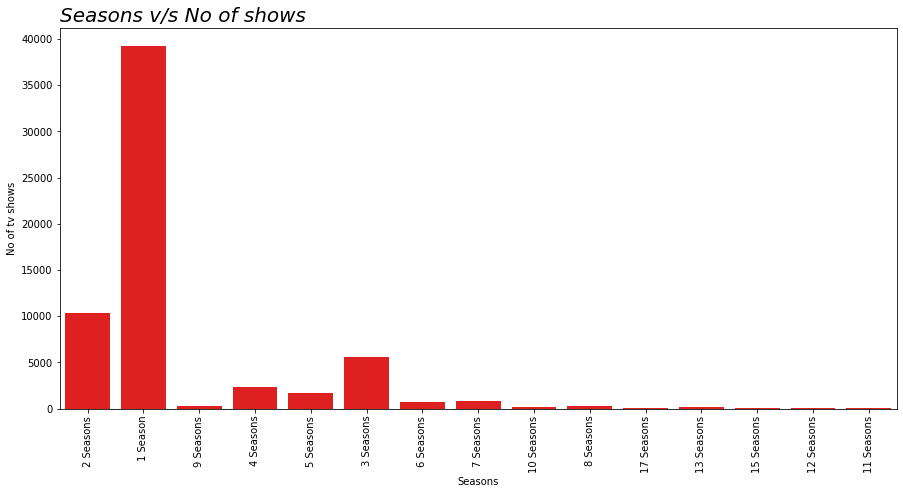

In [ ]:
plt.figure(figsize=(15,7)) #ploting a count plot to show Tv seasons analysis
sns.countplot(data = tv , x = "duration",color = 'red')
plt.title("Seasons v/s No of shows",  fontsize = 20 ,  loc="left",
          fontstyle='italic', color= 'black' ) #countplot
plt.xlabel("Seasons")
plt.ylabel("No of tv shows")
plt.xticks(rotation = 90)
plt.show()

We can see that there are 1719 TV shows with only 1 season and 420 with 2 seasons each.There are shows having 13,15 or 17 seasons.We can infer that more the season , most liked or popular show it is.
The Grey's Anatomy is the romantic and medical drama with 17 seasons being the most liked one directed by Jay Oliva .

**Does Netflix has more focus on TV Shows than movies in recent years**

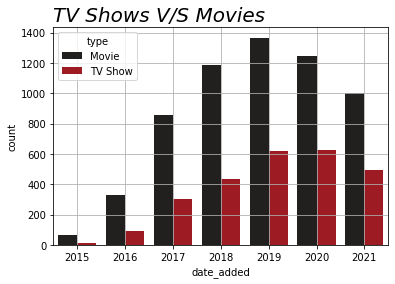

In [ ]:
data = df1[ (df1['date_added'].dt.year > 2014) ] #extracting data from 2014 to 2021
data['date_added'] = data['date_added'].dt.year  #extracting year from date_added column
data = data.drop_duplicates("title")

sns.countplot(data = data, x='date_added' , hue="type") # Dodget Bar Chart
plt.title("TV Shows V/S Movies" , fontsize = 20 ,  loc="left",
          fontstyle='italic' , color="black")
plt.grid()
plt.show()

As we can see that Netflix is more focused on Movies than Tv shows.There is steep increase in no of movies added from 2014 to 2019. This may be because of Covid-19 pandemic as there was lockdown over countries which obviously affected the production of movies.As of 2021 Netflix is focused on both Tv shows and Movies equally. Dominance of movies has been reduced in latest years

**Correlation between date added and released year of Movies and Tv shows using pairplot and heatmap**

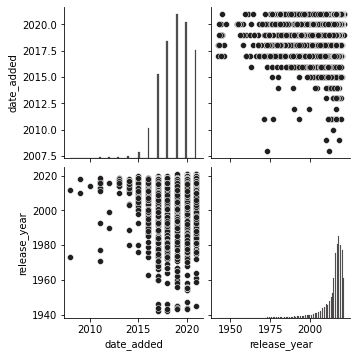

In [ ]:
# Relation ship between date_added and release_year using pair plot
data = df1[["date_added","release_year",'title']]
data = data.drop_duplicates('title')
data = data[["date_added","release_year"]]
data["date_added"] = data["date_added"].dt.year

sns.pairplot(data[["date_added","release_year"]])
plt.show()


In [ ]:
# Heat map
data.info()
import plotly.figure_factory as ff

corrs = data.corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation of whole Data',
                          plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                          title_font=dict(size=10, color='#a5a7ab', family="Muli, sans-serif"),
                          font=dict(color='#8a8d93'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 8703
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_added    8694 non-null   float64
 1   release_year  8704 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 204.0 KB


# **Business Insights**
1) There are 6131 movies and 2676 TV Shows in the netflix dataframe. Hence no of movies are prefered way more then TV Shows.

2) There are around 20 genres present in the data, in which Drama and International movies are the highest and popular.

3) The least liked genre among the users are Faith and Spirituality, Stand-Up Comedy content on Netflix.

4) We can say that viewers prefer movies over Tv shows in US and India. But its the reverse in case of South Korea, Taiwan, Japan.The South Asian countries prefer more TV shows and should be produced in order to engage the customer.

5) Top 2 genre among movies in USA - 'Comedies and Dramas' are top 2 popular in USA

6) Top 2 genre among TV Shows in USA : 'TV Dramas and TV Comedies'

7) Top 2 genre among movies in India :'International Movies and Dramas'

8) Top 2 genre among TV shows in India :'International TV Shows and TV Dramas'

9) There is boot in number of movies released from 1990 to 2018 over last 30 years.The sudden fall in movies may be because of covid situation worldwide.
Its the same trend for TV Shows as well.

10) There are 1290 movies/TV Shows added in 2018 year on Netflix.

11) Top 2 months for adding higher number of movies or TV shows: 'July and December'

12) Jan Suter is the top director , who hav directed 31 movies on Netflix. He is well known for his Stand-Up Comedy with TV-MA, TV-14 rating

13) Jay Oliva is the most popular director among the top 10 TV shows in genres like classic and Cult TV Shows.

14) Top 5 movie directors having the range from 87-659 for maximum number of tv shows where they worked for.

15) Actor : Craig Sechler have worked in 172 movies followed by El Negro Álvarez and Ben Ferencz  

16) Most worked Actor in TV Shows is Morgan Freeman followed by R. Kelly and David Attenborough

17) Majority of TV Shows and Movies have got TV-MA ratings by viewers.

18) The GREY'S ANATOMY series having 17 seasons is the most romantic popular TV show directed by Jay Oliva.

19) Top 2nd Show with 15 seasons is very popular show from United States & Cananda and has Rating:TV-14.This TV show falls in Classic & Cult TV, TV Action & Adventure and this show is directed by Phil Sgriccia

20) Rajiv Chilaka is an Indian director who has made around 22 movies in Children & Family Movies and Sports Movies genre.

21) Indian actors like Sharukh khan and Anupam Kher are listed under most promising actors


# **Recommendations**
1) Users are more interested in Dramas, International movies ,Comedies irrespective of country therefore more such content will benefit Netflix in long run.

2) From most popular genre we can see that viewers concentrate on entertainment factor then science or social related content. Hence releasing more of Comedies, Romantic, International shows can help in increase no of viewers.

3) Most of viewers are youth therefore this platform can help society in getting social change by investing on content related to daily-life crisis, LGBTQ, Poverty,etc

4) Festivals and Holidays are the best time to launch shows with respect to the location so that producer can gain much revenue. Keeping this in mind, User's engagement on platform can be increased and also help in getting new customers

5) Netflix needs to have different stratergy in terms of producing content for western countries and south asian countries

6) Drama is the most popular genre worldwide.So, Netflix can always rely on Drama type content for increasing market share and its growth in different  countries.

7) If nextflix wants low budget and young talent then low experienced cast are the most suitable.

8) Following are the top 5 experienced directors in the field of movies: Jan Suter, Raúl Campos, Marcus Raboy, Rajiv Chilaka and Richard Bailey. So, while creating a new content these are the best directors to select in terms of experience and popularity.

9) TV-MA is highly rated content which means mature content is more.

10) There was slight drop in content due to Covid-19 but company was performing well as people had more time to spend watching shows during lockdown.

11) Netflix has made a remarkable market share in movies but there is a huge scope for TV shows as well.they are trending. Impact of South Asian culture , KPop has made Tv dramas trending..So Netflix can invest more on them.





